In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
# Create synthetic time series data based on a sine wave
def create_time_series_data():
    time = np.arange(0, 100, 0.1)
    # Create a sine wave with some noise
    series = np.sin(time) + np.random.normal(0, 0.1, len(time))
    # Add a trend
    series = series + time / 50
    return time, series

# Create windows of time series data
def create_dataset(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)


In [3]:
# Generate the time series data
time, series = create_time_series_data()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
series_scaled = scaler.fit_transform(series.reshape(-1, 1))

# Create dataset with time windows
time_steps = 20
X, y = create_dataset(series_scaled, time_steps)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)


In [4]:
# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [5]:
# Build a simple RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(time_steps, 1)),
    tf.keras.layers.Dense(1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compile the model
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 0.4044 - val_loss: 0.4129
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1486 - val_loss: 0.0180
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - val_loss: 0.0079
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - val_loss: 0.0025
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - val_loss: 0.0016
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 11/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 12/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - v

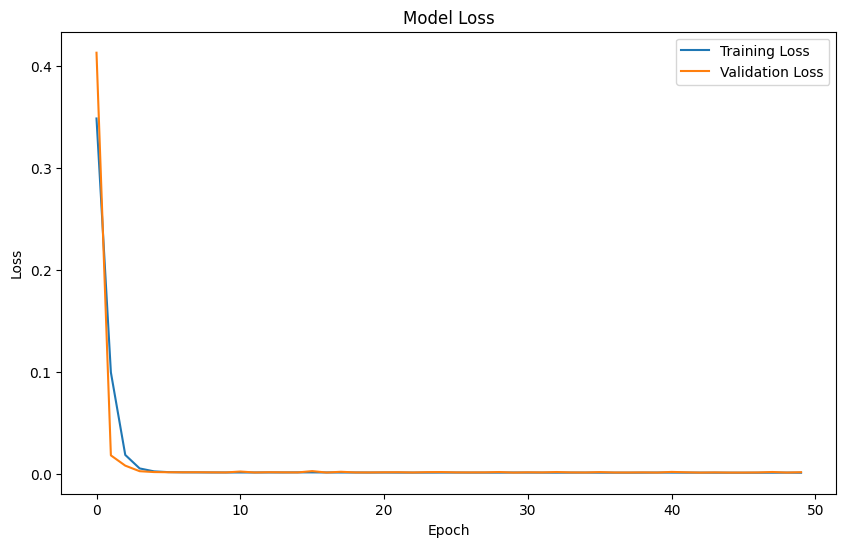

In [8]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [9]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Train RMSE: 0.1378
Test RMSE: 0.1830


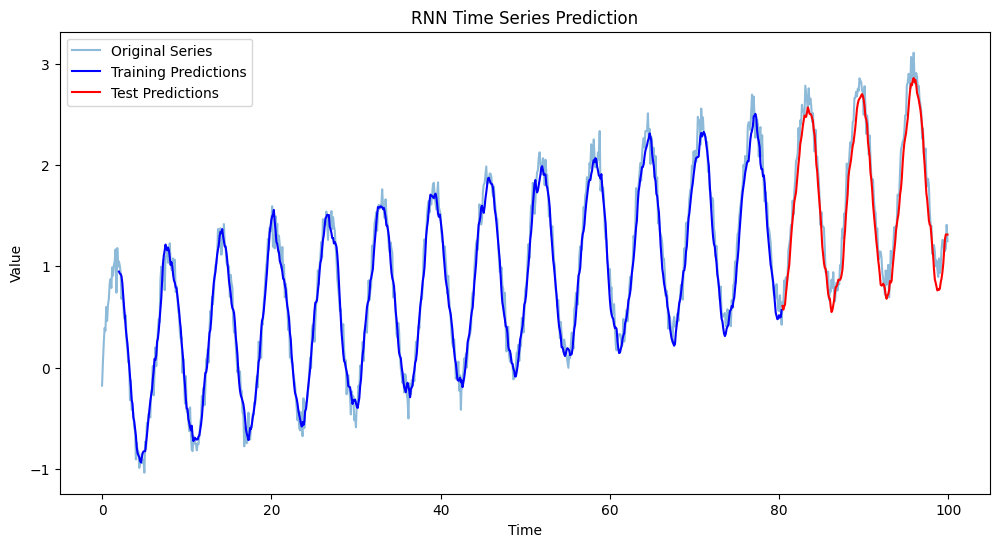

In [10]:
# Calculate RMSE
train_rmse = np.sqrt(np.mean((train_predict - y_train_inv) ** 2))
test_rmse = np.sqrt(np.mean((test_predict - y_test_inv) ** 2))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))

# Plot original series
plt.plot(time, series, label='Original Series', alpha=0.5)

# Plot training predictions
train_plot_idx = np.arange(time_steps, time_steps + len(train_predict))
plt.plot(time[train_plot_idx], train_predict, 'b', label='Training Predictions')

# Plot test predictions
test_plot_idx = np.arange(time_steps + len(train_predict), time_steps + len(train_predict) + len(test_predict))
plt.plot(time[test_plot_idx], test_predict, 'r', label='Test Predictions')

plt.title('RNN Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [11]:
# Prediction for multiple steps ahead
def predict_sequence(model, first_batch, n_steps):
    curr_batch = first_batch.copy()
    predicted = []

    for _ in range(n_steps):
        # Get prediction for current batch
        curr_pred = model.predict(curr_batch)[0][0]
        predicted.append(curr_pred)

        # Update batch for next prediction
        curr_batch = np.roll(curr_batch, -1, axis=1)
        curr_batch[0, -1, 0] = curr_pred

    return np.array(predicted)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━

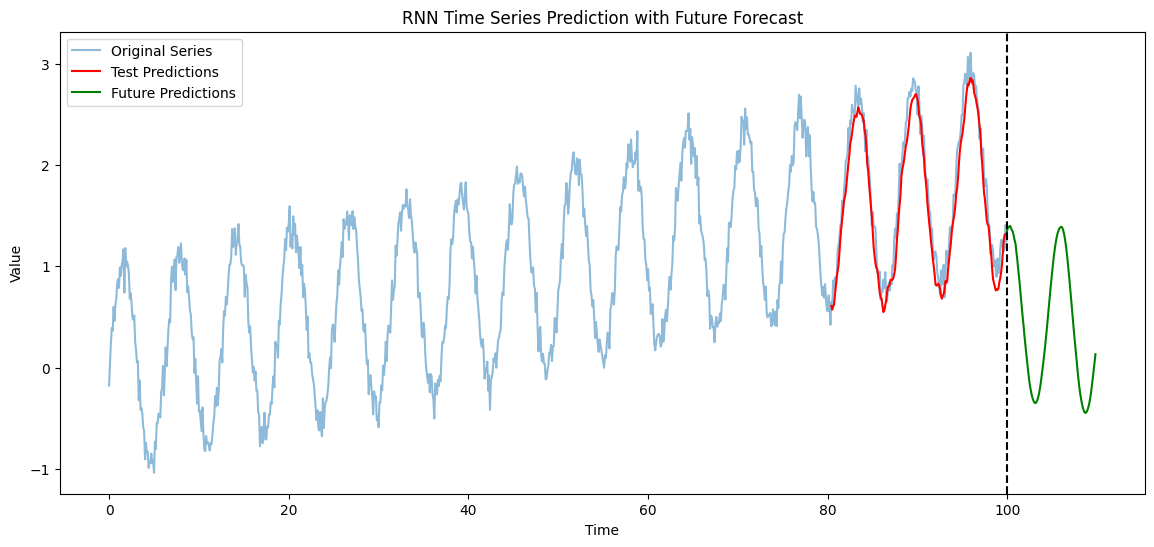

In [12]:
# Predict 100 steps ahead
future_steps = 100
last_batch = X_test[-1].reshape(1, time_steps, 1)
future_predictions = predict_sequence(model, last_batch, future_steps)
future_predictions = scaler.inverse_transform(future_predictions.reshape(-1, 1))

# Create future time points
future_time = np.arange(time[-1], time[-1] + future_steps*0.1, 0.1)

# Plot with future predictions
plt.figure(figsize=(14, 6))
plt.plot(time, series, label='Original Series', alpha=0.5)
plt.plot(time[test_plot_idx], test_predict, 'r', label='Test Predictions')
plt.plot(future_time, future_predictions, 'g', label='Future Predictions')
plt.axvline(x=time[-1], color='k', linestyle='--')
plt.title('RNN Time Series Prediction with Future Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()